
# **Contornos**

#### **Iremos aprender:**
1. Função findContours
2. Desenhando Contornos
3. Hierarquia de contornos
4. Contouring Modes (Simple vs Approx) 

In [5]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 20):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## **O que são Contornos?**
Contornos são linhas ou curvas contínuas que limitam ou cobrem todo o limite de um objeto.

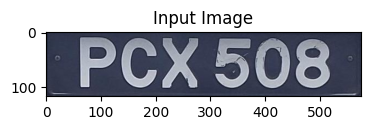

(117, 576, 3)

In [36]:
# Let's load a simple image license plate image
image = cv2.imread('images/LP.jpg')
imshow('Input Image', image)
image.shape

#### **Função cv2.findContours()**

Processo Interno da Função cv2.findContours

* Entrada de uma Imagem Binária: A imagem de entrada deve ser binária. Isso significa que ela contém apenas duas intensidades de pixel: uma para o fundo (geralmente preto, valor 0) e outra para o objeto (geralmente branco, valor 255).
Se a imagem for em tons de cinza ou colorida, você deve convertê-la para binária usando funções como cv2.threshold ou Canny Edge Detection.

* Busca de Transições: A função percorre cada pixel da imagem linha por linha e coluna por coluna.
Quando ela encontra uma transição de intensidade (por exemplo, de um pixel preto para um pixel branco), ela identifica o início de um contorno.

* **Rastreamento do Contorno**: Uma vez encontrada a borda inicial, o OpenCV aplica o algoritmo de rastreamento de contorno, que segue a borda ao longo de seus pixels adjacentes.
O algoritmo detecta pixels vizinhos que fazem parte do contorno e os conecta em sequência.
Esse processo continua até que o contorno esteja completamente fechado ou chegue ao final do objeto.

* Método de Aproximação: O comportamento de como os contornos são representados depende do parâmetro method:

    - cv2.CHAIN_APPROX_NONE: Mantém todos os pontos do contorno, resultando em um conjunto denso de coordenadas.

    - cv2.CHAIN_APPROX_SIMPLE: Remove pontos redundantes. Apenas os pontos-chave (pontos de início, fim e curvas) são mantidos, comprimindo os contornos.

* Organização Hierárquica (Opcional):
O parâmetro mode controla a maneira como os contornos são organizados.
Se a hierarquia for ativada (exemplo, com cv2.RETR_TREE), o OpenCV organiza os contornos em uma estrutura que identifica pais e filhos:
Contornos externos (o limite de um objeto) e buracos internos (regiões vazias dentro de um objeto).

* Saída: A função retorna uma lista de contornos, onde cada contorno é representado como uma sequência de coordenadas de pontos (𝑥,𝑦). 
Se solicitado, a função também retorna a hierarquia desses contornos.

### Rastreamento do contorno

O algoritmo Suzuki e Abe (1985) é amplamente utilizado, inclusive no OpenCV, para rastrear bordas em imagens binárias. Ele usa hierarquia para detectar contornos externos e internos.

Varredura Inicial:
A imagem é varrida pixel por pixel, da esquerda para a direita e de cima para baixo.
O algoritmo busca pelo primeiro pixel branco (255) que representa uma possível borda.

Início do Rastreamento:
Ao encontrar um pixel branco, o algoritmo identifica esse pixel como o início do contorno.
A partir desse ponto, ele verifica os pixels vizinhos seguindo as regras de 8-conectividade ou 4-conectividade.

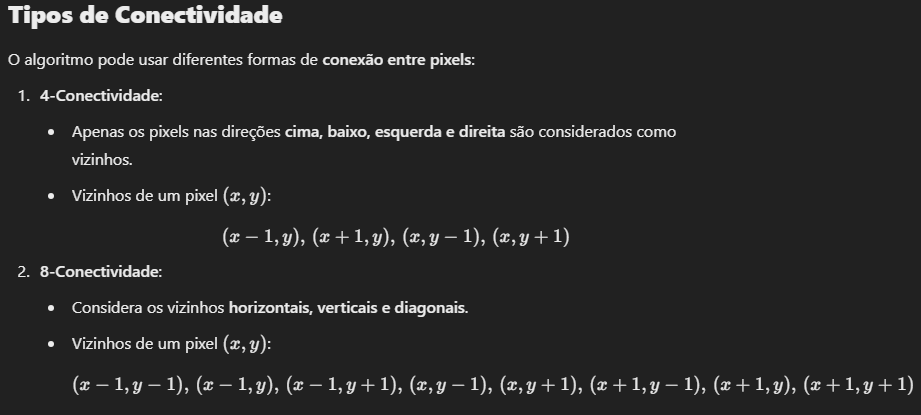

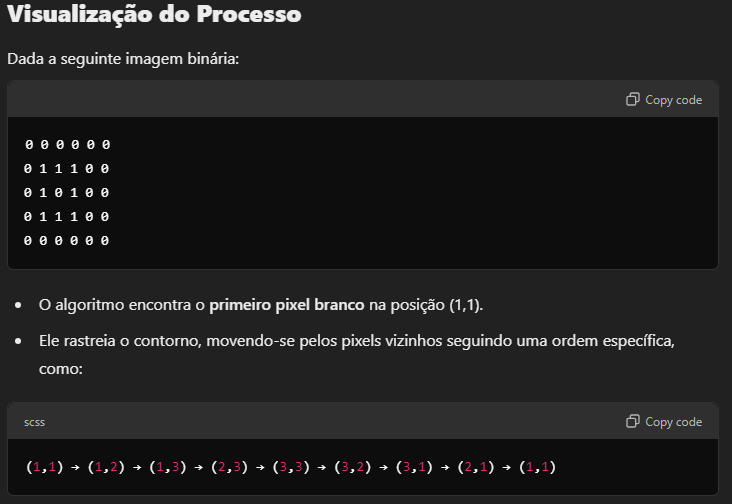

Regra de Rastreamento:
O algoritmo examina os pixels vizinhos em ordem circular (no sentido horário ou anti-horário), partindo do pixel anterior.
Assim que um vizinho branco é encontrado, ele é marcado como parte do contorno e se torna o novo pixel atual.
O processo se repete até que o rastreamento retorne ao ponto inicial ou todos os pixels do contorno tenham sido visitados.

Registro dos Pontos:
Durante o rastreamento, o algoritmo armazena as coordenadas dos pixels do contorno em uma lista.
Dependendo do método de aproximação usado (como CHAIN_APPROX_NONE ou CHAIN_APPROX_SIMPLE), os pontos redundantes podem ser removidos.

#### **Aplicando a função cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

A função findContours recupera todos os contornos da imagem que pode encontrar. Pode haver várias maneiras pelas quais os contornos podem estar presentes na imagem. Alguns podem estar aninhados em outros contornos, etc.
Para facilitar a localização dos contornos nos quais estamos interessados ​​e também conhecer a hierarquia na qual os contornos estão aninhados, os RetrievalModes são muito importantes.

**Retrieval Modes** - A saída de RetrievalModes é uma hierarquia de array que mostra como vários contornos estão vinculados entre si, sua relação com outros contornos, relação pai-filho

- **RETR_LIST** - Recupera todos os contornos, mas não cria nenhuma relação pai-filho. Pais e filhos são iguais sob esta regra e são apenas contornos. ou seja, todos pertencem ao mesmo nível de hierarquia.

- **RETR_EXTERNAL** - Retorna apenas sinalizadores externos extremos. Todos os contornos filhos são deixados para trás.

- **RETR_CCOMP** - recupera todos os contornos e os organiza em uma hierarquia de 2 níveis. ou seja, os contornos externos do objeto (ou seja, seus limites) são colocados na hierarquia-1. E os contornos dos furos dentro do objeto (se houver) são colocados na hierarquia-2. Se houver algum objeto dentro dele, seu contorno será colocado novamente apenas na hierarquia-1. E seu buraco na hierarquia 2 e assim por diante.

- **RETR_TREE** -  Ele recupera todos os contornos e cria uma lista completa de hierarquia familiar.

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Armazena todos os pontos ao longo da linha (ineficiente!)
- cv2.CHAIN_APPROX_SIMPLE – Armazena os pontos finais de cada linha




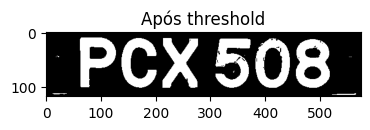

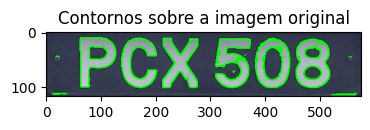

Numero de contornos encontrados = 38


In [39]:
image = cv2.imread('images/LP.jpg')

# Transformando em binária a imagem
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Após threshold', th2)

# Encontrando contornos
# Usar uma copia da imagem para aplicar
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Desenhar todos os contornos, observe que iremos sobrescrever a imagem original
# Usamos '-1' as the 3rd parameter to draw all
#pintando de verde
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contornos sobre a imagem original', image)

print("Numero de contornos encontrados = " + str(len(contours)))


Observando o primeiro contorno, a sequencia de pixels


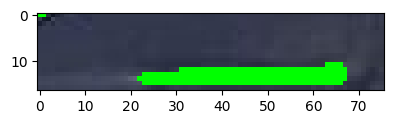

array([[[564, 112]],

       [[563, 113]],

       [[562, 113]],

       [[561, 113]],

       [[560, 113]],

       [[559, 113]],

       [[558, 113]],

       [[557, 113]],

       [[556, 113]],

       [[555, 113]],

       [[554, 113]],

       [[553, 113]],

       [[552, 113]],

       [[551, 113]],

       [[550, 113]],

       [[549, 113]],

       [[548, 113]],

       [[547, 113]],

       [[546, 113]],

       [[545, 113]],

       [[544, 113]],

       [[543, 113]],

       [[542, 113]],

       [[541, 113]],

       [[540, 113]],

       [[539, 113]],

       [[538, 113]],

       [[537, 113]],

       [[536, 113]],

       [[535, 113]],

       [[534, 113]],

       [[533, 113]],

       [[532, 113]],

       [[531, 114]],

       [[530, 114]],

       [[529, 114]],

       [[528, 114]],

       [[527, 114]],

       [[526, 114]],

       [[525, 114]],

       [[524, 114]],

       [[523, 114]],

       [[524, 114]],

       [[525, 114]],

       [[526, 114]],

       [[5

In [ ]:
print('Observando o primeiro contorno, a sequencia de pixels')
imshow('',image[100:117,500:576])
contours[0]

#### **O que acontece se não utilizarmos o limiar para aplicar o contorno ?**

Quando uma imagem em tons de cinza ou colorida é usada diretamente com cv2.findContours, os valores dos pixels não estão limitados a 0 ou 255, mas possuem uma escala contínua (exemplo: de 0 a 255 em tons de cinza). O OpenCV não sabe quais valores devem representar as "bordas" ou os "objetos" na imagem.
O algoritmo de rastreamento de bordas busca transições entre valores (de fundo para objeto ou vice-versa) em imagens binárias.
Em uma imagem sem threshold, a variação contínua de intensidade faz com que não haja bordas bem definidas.
Como resultado, o algoritmo pode identificar apenas os limites externos da imagem (borda da imagem), pois é onde a transição de intensidade é mais "notável

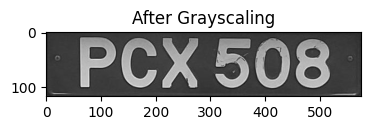

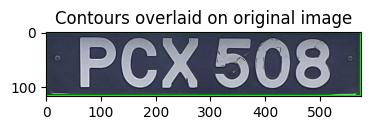

Number of Contours found = 1


In [44]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray)

# Finding Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

# **NOTA: Para que findContours funcione, o fundo deve ser preto e o primeiro plano (ou seja, o texto ou objetos)** 

#### Caso contrário, você precisará inverter a imagem usando **cv2.bitwise_not(input_image)**

#### **Podemos usar Canny Edges em vez de Thresholding**

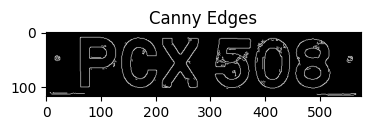

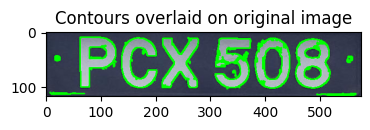

Number of Contours found = 77


In [45]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))


## **GUARDE OS PASSOS PARA ENCONTRAR BORDAS**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Suavização (algum filtro passa-baixa) deve ser feita antes da binarização, para remover ruídos.

# **Retreival Modes** 

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierarquia**

A hierarquia de contornos existe para organizar os contornos encontrados em uma imagem em uma estrutura relacional que identifica como os contornos se relacionam entre si. Isso é especialmente útil em imagens com contornos internos e externos (como buracos ou objetos aninhados) e quando você deseja distinguir entre eles.

Permite lidar com objetos que contêm outros objetos dentro deles (como uma série de círculos concêntricos).
Facilita operações seletivas, como de Desenhar apenas contornos externos e/ou Processar apenas os contornos internos (buracos).

Esta matriz armazena 4 valores para cada contorno:
- O primeiro termo é o índice do próximo contorno
- O segundo termo é o índice do contorno anterior
- O terceiro termo é o índice do contorno pai
- O quarto termo é o índice do contorno filho

Nota: Valor -1, não existe relacionamento ou valor. 

### **RETR_LIST**
Recupera todos os contornos, mas não cria nenhuma relação pai-filho. Pais e filhos são iguais sob esta regra e são apenas contornos. ou seja, todos pertencem ao mesmo nível de hierarquia.

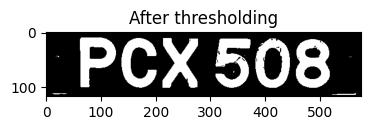

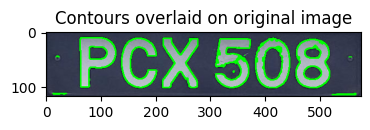

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [-1 36 -1 -1]]]


In [46]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**

Retorna apenas contornos externos extremos. Todos os contornos filhos são deixados para trás. NÃO PEGAMOS OS BURACOS NOS OBJETOS E FORMAS

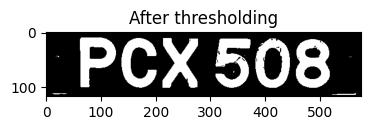

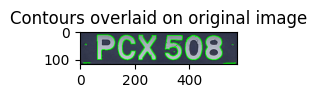

Number of Contours found = 16
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [-1 14 -1 -1]]]


In [47]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_CCOMP**

Recupera todos os contornos e os organiza em uma hierarquia de 2 níveis. ou seja, os contornos externos do objeto (ou seja, seus limites) são colocados na hierarquia-1. E os contornos dos furos dentro do objeto (se houver) são colocados na hierarquia-2. Se houver algum objeto dentro dele, seu contorno será colocado novamente apenas na hierarquia-1. E seu buraco na hierarquia 2 e assim por diante.

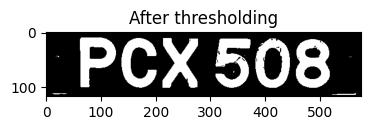

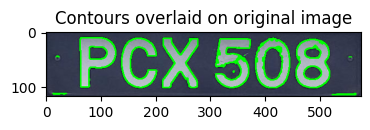

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [48]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE**
Ele recupera todos os contornos e cria uma lista completa de hierarquia familiar.

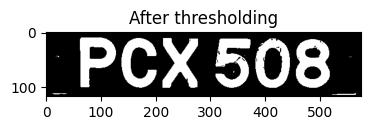

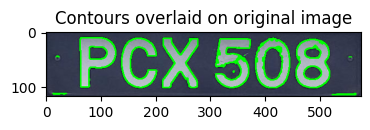

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [49]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

## **Contouring Modes**

#### **CHAIN_APPROX_NONE**

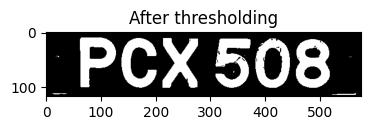

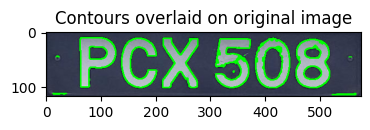

Number of Contours found = 38
87
50
7
1
1
1
1
4
2
1
236
80
6
75
10
4
8
426
6
4
4
10
14
21
17
241
6
14
15
155
14
9
358
4
4
347
272
92


In [50]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))


#### **CHAIN_APPROX_SIMPLE**

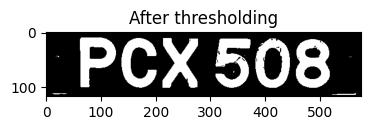

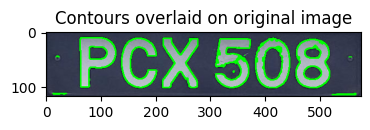

Number of Contours found = 38
8
10
7
1
1
1
1
4
2
1
114
40
6
37
6
4
8
172
6
4
4
6
6
15
11
121
6
6
8
57
8
7
170
4
4
164
65
27


In [51]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))